# Regression Model

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data preprocessing


### 1. Missing values

In [3]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### 2. Encoding 
-  in tree based model always use label encoding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['State'] = label.fit_transform(data['State'])

In [6]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


### 3. Split data

In [7]:
x = data.iloc[:,0:-1]
y = data[['Profit']]

In [8]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 1)

### Buildig Decision tree regression

In [10]:
from sklearn.tree import DecisionTreeRegressor
dtreg =DecisionTreeRegressor()
dtreg.fit(x_train,y_train)

DecisionTreeRegressor()

In [11]:
#predict test data with DT regression model
y_pred_train =  dtreg.predict(x_train)
y_pred_test = dtreg.predict(x_test)


In [12]:
# evaluate your model
from sklearn.metrics import r2_score


In [13]:
# evaluate your model
print("Training accuracy: ",r2_score(y_train, y_pred_train))
print()
print("Test accuracy: ",r2_score(y_test, y_pred_test))

Training accuracy:  1.0

Test accuracy:  0.8880297787792052


In [14]:
# crossvalidation for overfitting 
from sklearn.model_selection import cross_val_score
training_acc = cross_val_score(dtreg, x_train,y_train, cv=10)
print(training_acc)

[  0.78360429   0.84244913   0.55435677   0.87707088   0.98007281
   0.26165478   0.92993926   0.88695806 -21.22435468   0.92614543]


In [15]:
training_acc.mean()

-1.418210328369147

# linear regression model

In [16]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [17]:
ypred = lin.predict(x_train)
ypred_test = lin.predict(x_test)

In [18]:
print("Training accuracy: ",r2_score(y_train, ypred))
print()
print("Test accuracy: ",r2_score(y_test, ypred_test))

Training accuracy:  0.9419507593691142

Test accuracy:  0.9616053937220066


# Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rf_reg = RandomForestRegressor(n_estimators = 500)

In [21]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [22]:
ypredrf = rf_reg.predict(x_train)
ypred_testrf = rf_reg.predict(x_test)

In [23]:
print("Training accuracy: ",r2_score(y_train, ypredrf))
print()
print("Test accuracy: ",r2_score(y_test, ypred_testrf))

Training accuracy:  0.9859948828105585

Test accuracy:  0.9438986402987688


# Regression and Classification model

In [24]:
peng = pd.read_csv('penguins_lter.csv')
peng.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181,.,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/2007,40.3,18.0,.,3250,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/2007,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NaN


In [25]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    object 
 12  Body Mass (g)        342 non-null    object 
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [26]:
peng.drop(['studyName','Sample Number','Individual ID','Date Egg','Comments'], axis = 1, inplace = True)

In [27]:
peng.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.1,18.7,181,.,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.3,18.0,.,3250,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426


# Data Preprocessing

In [28]:
peng.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [29]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    object 
 8   Body Mass (g)        342 non-null    object 
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(4), object(8)
memory usage: 32.4+ KB


In [30]:
# finding unique values
for i in peng.columns:
    print('***************',i,'***********')
    print()
    print(set(peng[i].tolist()))

*************** Species ***********

{'Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)'}
*************** Region ***********

{'Anvers'}
*************** Island ***********

{'Biscoe', 'Torgersen', 'Dream'}
*************** Stage ***********

{'Adult, 1 Egg Stage'}
*************** Clutch Completion ***********

{'No', 'Yes'}
*************** Culmen Length (mm) ***********

{49.4, 49.9, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.7, 38.9, 39.5, 40.3, 42.0, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 44.0, 48.2, 45.0, 50.2, nan, nan, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 36.0, 36.9, 37.7, 37.9, 37.2, 37.6, 37.0, 38.6, 38.2, 38.8, 37.5, 37.3, 39.1, 39.3, 39.2, 39.8, 39.6, 39.0, 39.7, 40.6, 40.5, 40.9, 41.1, 40.8, 40.1, 41.4, 41.3, 41.6, 41.8, 41.0, 42.2, 42.3, 42.8, 42.1, 42.9, 43.2, 4

In [31]:
peng['Flipper Length (mm)'] = np.where(peng['Flipper Length (mm)']=='.','190',peng['Flipper Length (mm)'])

In [32]:
peng['Body Mass (g)'].mode()

0    3800
Name: Body Mass (g), dtype: object

In [33]:
peng['Body Mass (g)'] = np.where(peng['Body Mass (g)']=='.','3800',peng['Body Mass (g)'])

In [34]:
peng['Sex'].mode()

0    MALE
Name: Sex, dtype: object

In [35]:
peng['Sex'] = np.where(peng['Sex']=='.','MALE',peng['Sex'])

In [36]:
peng['Flipper Length (mm)'] = pd.to_numeric(peng['Flipper Length (mm)'])
peng['Body Mass (g)'] = pd.to_numeric(peng['Body Mass (g)'])

In [37]:
peng.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [38]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    float64
 8   Body Mass (g)        342 non-null    float64
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(6)
memory usage: 32.4+ KB


In [39]:
peng['Sex'].value_counts()

Sex
MALE      169
FEMALE    165
Name: count, dtype: int64

In [40]:
peng['Sex'] = peng['Sex'].fillna('MALE')

In [41]:
peng['Culmen Length (mm)'] = peng['Culmen Length (mm)'].fillna(peng['Culmen Length (mm)'].median())

In [42]:
peng['Culmen Depth (mm)'] = peng['Culmen Depth (mm)'].fillna(peng['Culmen Depth (mm)'].median())

In [43]:
#splittind data into x and y
x = peng.iloc[:,1:]
y = peng['Species']

In [44]:
numerical =['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
categorical = ['Species','Region','Island','Stage','Sex']

In [45]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan,strategy = 'median')
peng[numerical] = impute.fit_transform(peng[numerical])

In [46]:
peng.isnull().sum()

Species                0
Region                 0
Island                 0
Stage                  0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

# Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
lebale = LabelEncoder()
peng['Species'] = label.fit_transform(peng['Species'])
peng['Region'] = label.fit_transform(peng['Region'])
peng['Island'] = label.fit_transform(peng['Island'])
peng['Stage'] = label.fit_transform(peng['Stage'])
peng['Sex'] = label.fit_transform(peng['Sex'])
peng['Clutch Completion'] = label.fit_transform(peng['Clutch Completion'])


In [48]:
peng.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,0,2,0,1,39.10,18.7,181.0,3800.0,1,8.652405,-25.83352
1,0,0,2,0,1,39.50,17.4,186.0,3800.0,0,8.949560,-24.69454
2,0,0,2,0,1,40.30,18.0,190.0,3250.0,0,8.368210,-25.33302
3,0,0,2,0,1,44.45,17.3,197.0,4050.0,1,8.652405,-25.83352
4,0,0,2,0,1,36.70,19.3,193.0,3450.0,0,8.766510,-25.32426


In [49]:
peng.describe()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,344.0,344.000000,344.0,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.0,0.662791,0.0,0.895349,43.925000,17.152035,200.877907,4201.017442,0.520349,8.730086,-25.691855
std,0.893320,0.0,0.726194,0.0,0.306549,5.443792,1.969060,14.032539,799.618885,0.500313,0.540630,0.779277
min,0.000000,0.0,0.000000,0.0,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,7.632200,-27.018540
25%,0.000000,0.0,0.000000,0.0,1.000000,39.275000,15.600000,190.000000,3550.000000,0.000000,8.307415,-26.285460
50%,1.000000,0.0,1.000000,0.0,1.000000,44.450000,17.300000,197.000000,4050.000000,1.000000,8.652405,-25.833520
75%,2.000000,0.0,1.000000,0.0,1.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,9.136170,-25.089467
max,2.000000,0.0,2.000000,0.0,1.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,10.025440,-23.787670


In [50]:
import dtale
dtale.show(peng)

<Axes: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

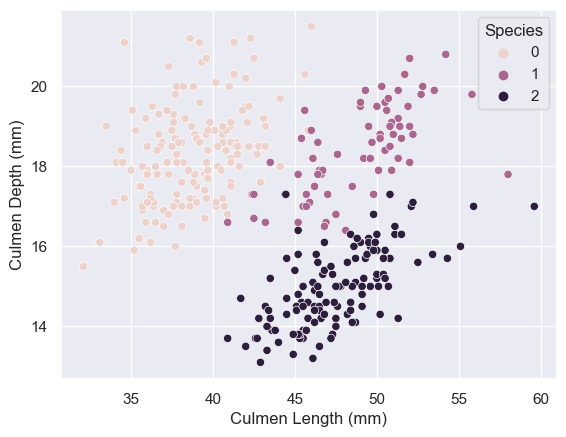

In [51]:
sns.scatterplot(x = 'Culmen Length (mm)', y ='Culmen Depth (mm)', data = peng, hue = 'Species')

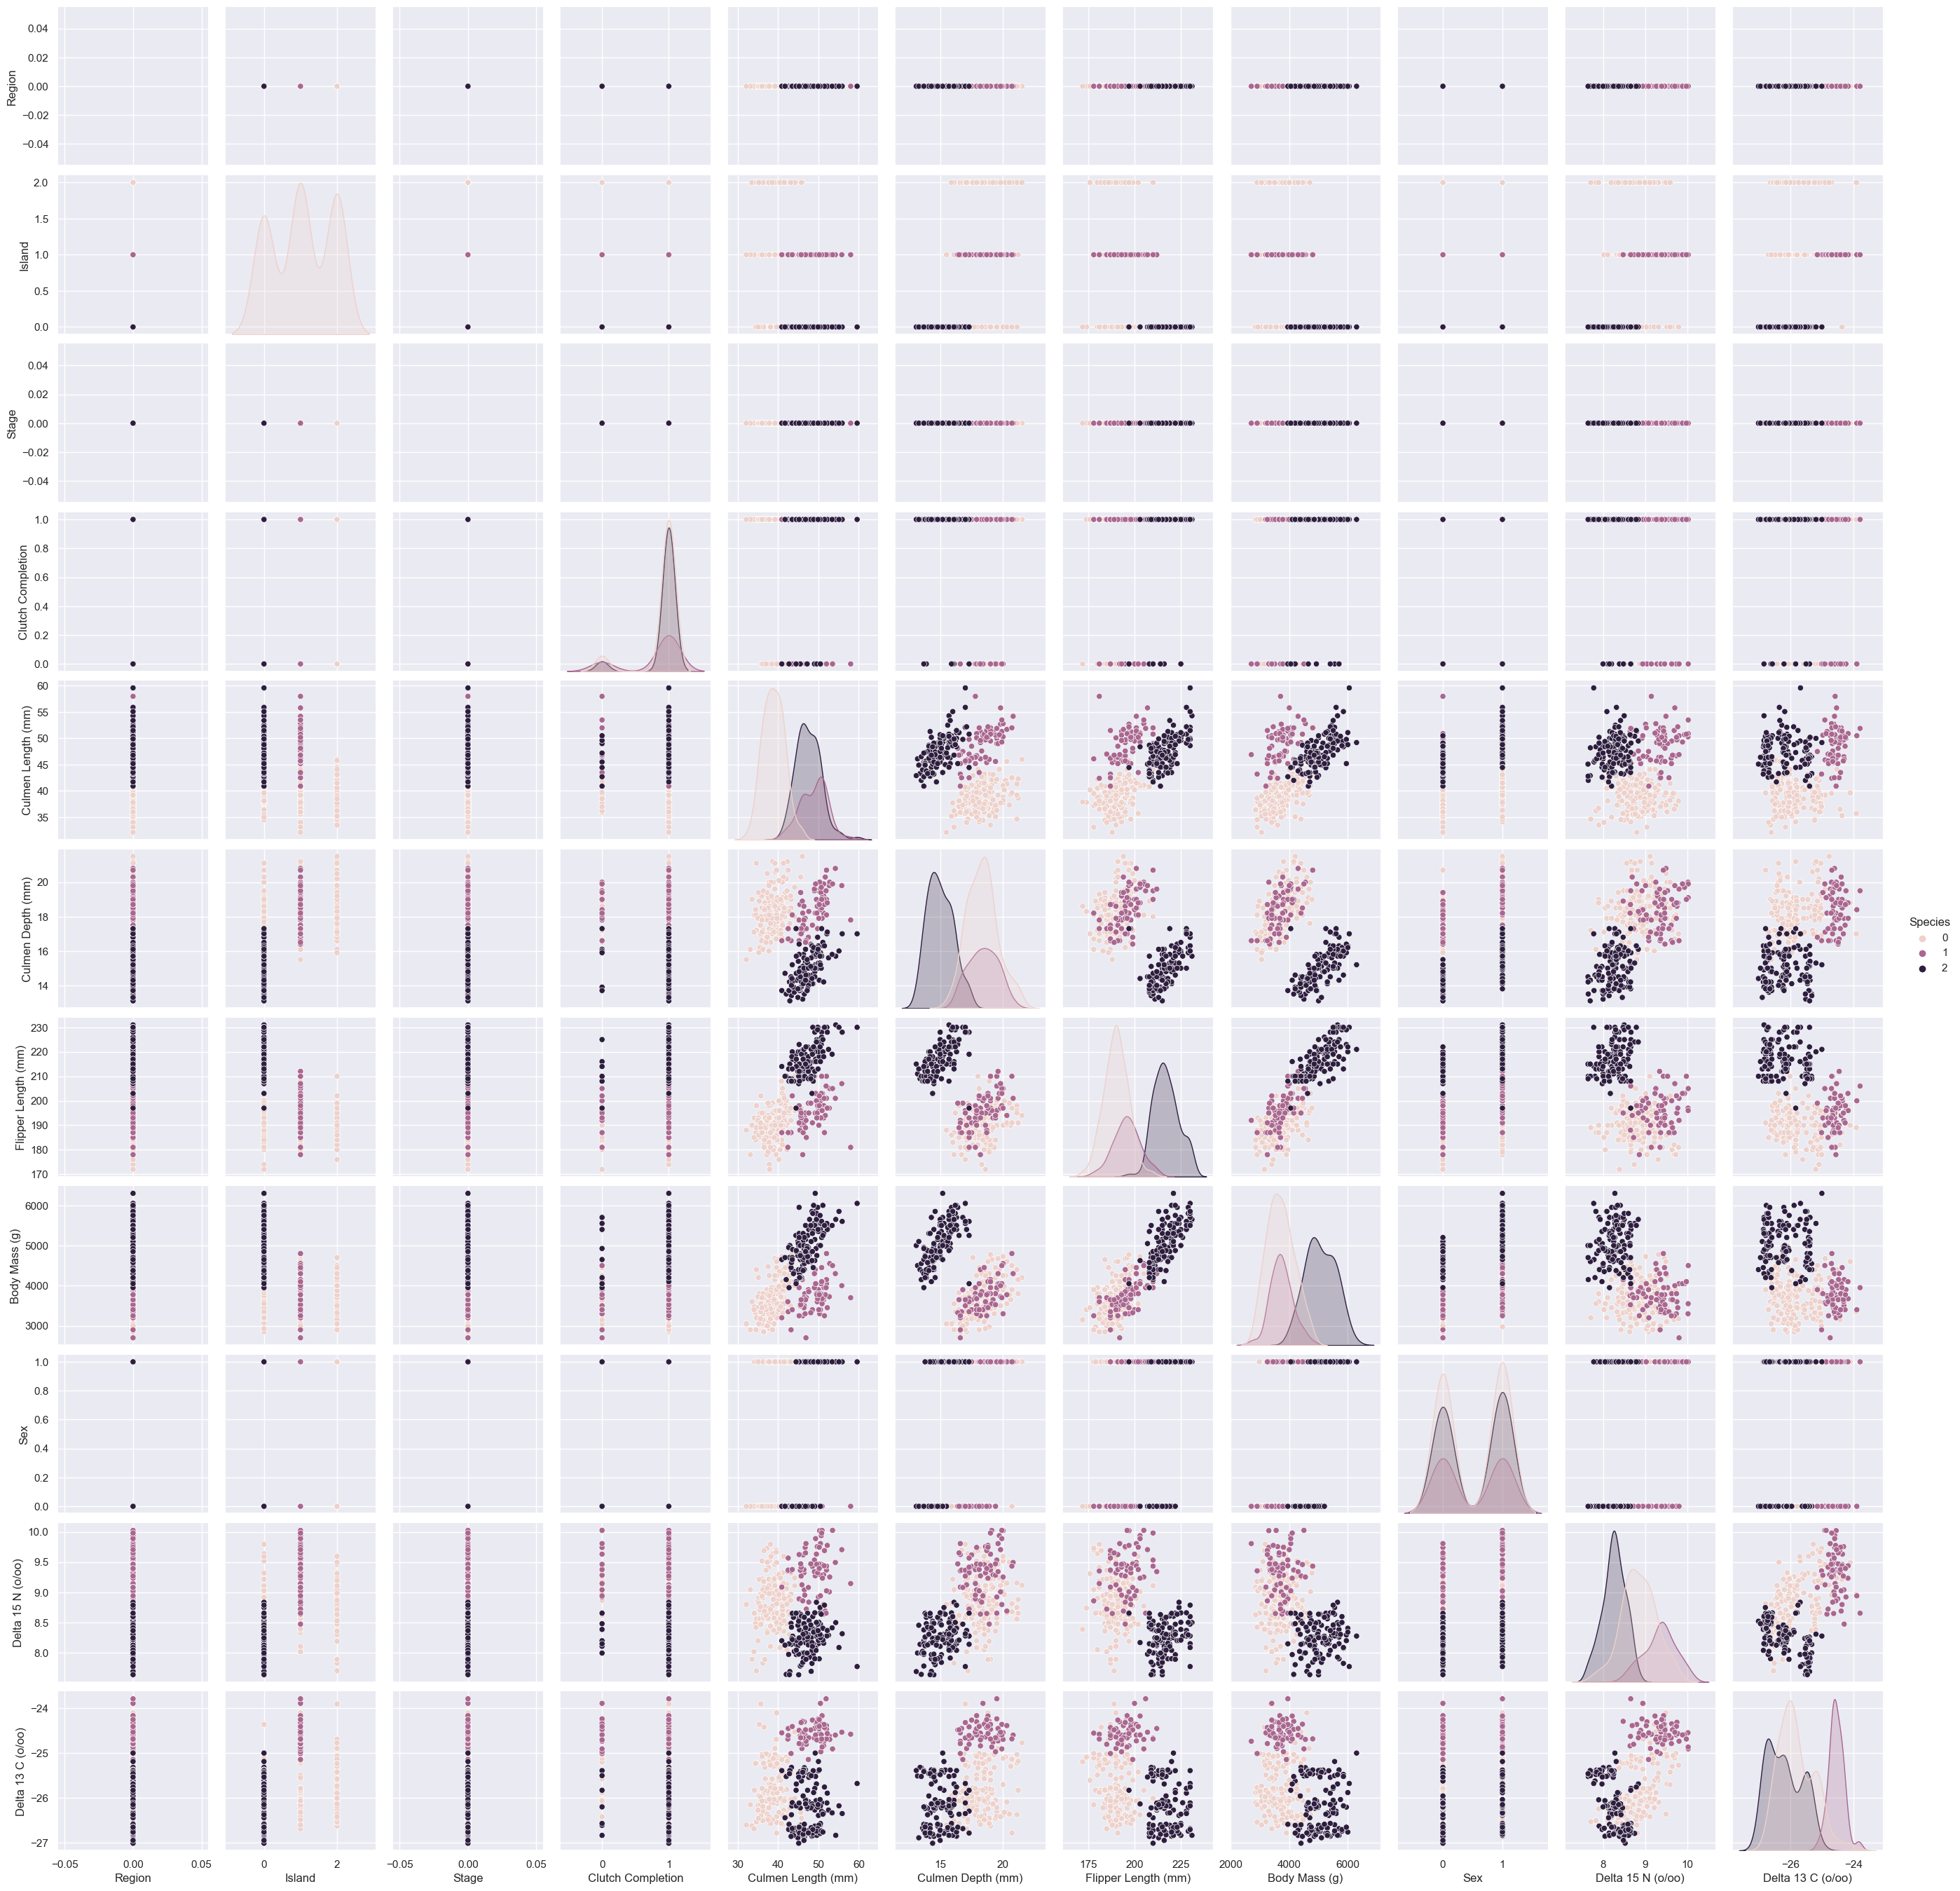

In [52]:
sns.pairplot(data=peng, hue = 'Species')
plt.show()

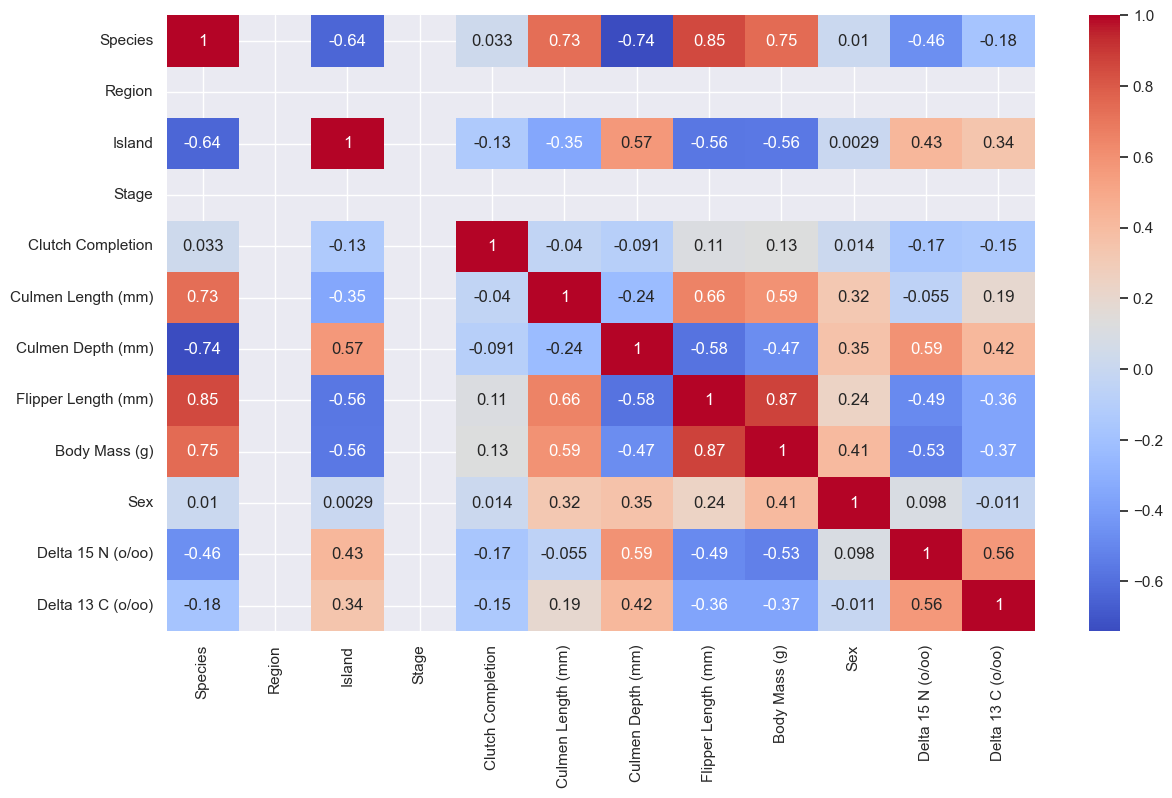

In [84]:
# finding correlation
plt.figure(figsize=(14,8))
sns.heatmap(peng.corr(), annot=True,cmap = 'coolwarm')
plt.show()

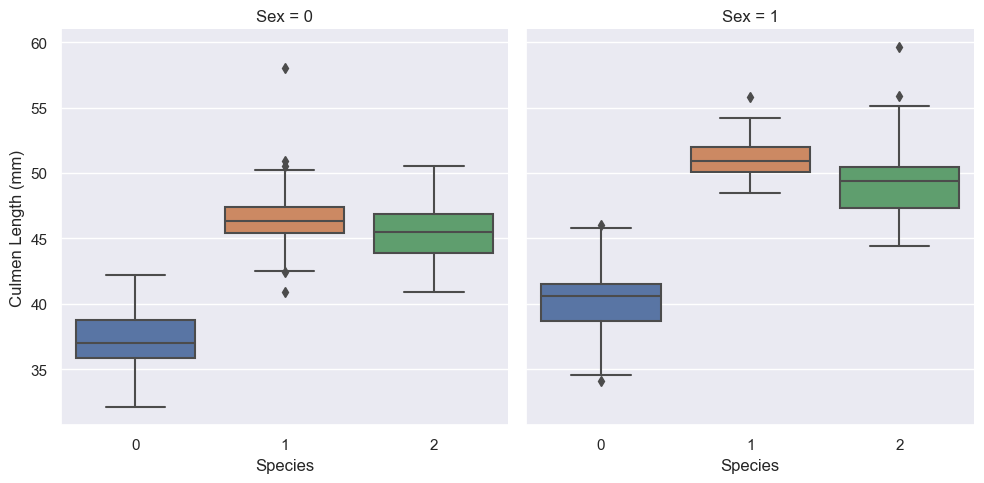

In [54]:
sns.catplot(data=peng, x= 'Species', y= 'Culmen Length (mm)', kind = 'box', col ='Sex' )

In [55]:
x = peng.iloc[:,1:]
y = peng['Species']

In [56]:
 # spliting columns has been done above lets check
x.head()

,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,2,0,1,39.10,18.7,181.0,3800.0,1,8.652405,-25.83352
1,0,2,0,1,39.50,17.4,186.0,3800.0,0,8.949560,-24.69454
2,0,2,0,1,40.30,18.0,190.0,3250.0,0,8.368210,-25.33302
3,0,2,0,1,44.45,17.3,197.0,4050.0,1,8.652405,-25.83352
4,0,2,0,1,36.70,19.3,193.0,3450.0,0,8.766510,-25.32426


In [57]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [58]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

x_ovr,y_ovr = ros.fit_resample(x,y)
print("Imbalnced datapoint: ", y.value_counts())
print()
print("Balanced datapoint: ", y_ovr.value_counts())

Imbalnced datapoint:  Species
0    152
2    124
1     68
Name: count, dtype: int64

Balanced datapoint:  Species
0    152
1    152
2    152
Name: count, dtype: int64


In [59]:
# split data into training and test for building and predictive purpose
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test= train_test_split(x_ovr,y_ovr,test_size = 0.25,random_state =12,stratify = y_ovr)

# Building DT model

In [60]:
from sklearn.tree import DecisionTreeClassifier

dtree1 = DecisionTreeClassifier(criterion = 'gini')
dtree1.fit(x_train,y_train)
dtree2 = DecisionTreeClassifier(criterion = 'entropy')
dtree2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [61]:
y_pred_1 = dtree1.predict(x_train)
y_pred_1_test = dtree1.predict(x_test)

In [62]:
y_pred_2 = dtree2.predict(x_train)
y_pred_2_test = dtree2.predict(x_test)

In [63]:
# evaluate model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [64]:
print(classification_report(y_train,y_pred_1))
print()
print(classification_report(y_test,y_pred_1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       114

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       1.00      0.97      0.99        38
           2       0.97      1.00      0.99        38

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [65]:
print(classification_report(y_train,y_pred_2))
print()
print(classification_report(y_test,y_pred_2_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       114

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       1.00      0.97      0.99        38
           2       0.97      0.97      0.97        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [66]:
print(confusion_matrix(y_train,y_pred_1))
print()
print(confusion_matrix(y_test,y_pred_1_test))

[[114   0   0]
 [  0 114   0]
 [  0   0 114]]

[[37  0  1]
 [ 1 37  0]
 [ 0  0 38]]


In [67]:
print(confusion_matrix(y_train,y_pred_2))
print()
print(confusion_matrix(y_test,y_pred_2_test))

[[114   0   0]
 [  0 114   0]
 [  0   0 114]]

[[37  0  1]
 [ 1 37  0]
 [ 1  0 37]]


In [68]:
print(accuracy_score(y_train,y_pred_1))
print()
print(accuracy_score(y_test,y_pred_1_test))

1.0

0.9824561403508771


In [69]:
print(accuracy_score(y_train,y_pred_2))
print()
print(accuracy_score(y_test,y_pred_2_test))

1.0

0.9736842105263158


# cross validation score - k_fold

In [70]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(dtree1,x_train,y_train,cv=10)
print(acc)
print()
print(acc.mean())
print()
print(acc.max())

[1.         0.97142857 1.         1.         0.97058824 0.94117647
 0.94117647 0.97058824 0.94117647 0.94117647]

0.9677310924369747

1.0


In [71]:
cm = confusion_matrix(y_test, y_pred_1_test)

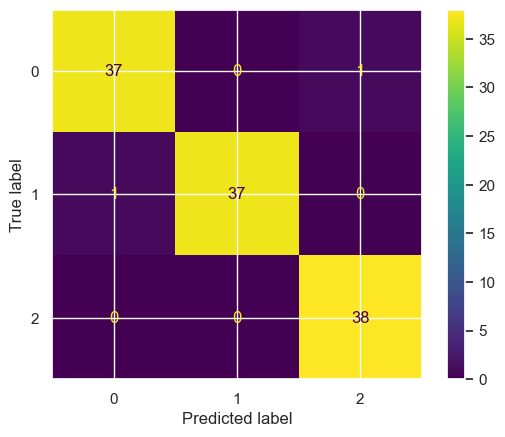

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix = ConfusionMatrixDisplay(cm)
c_matrix.plot(cmap = plt.cm.viridis)
plt.show()

# Post Prunning

In [73]:
dtree1.feature_importances_

array([0.        , 0.01692966, 0.        , 0.        , 0.42629335,
       0.04834392, 0.4490769 , 0.00138367, 0.        , 0.01052632,
       0.04744619])

In [74]:
pd.DataFrame(index= x.columns, data= dtree1.feature_importances_,columns = ['Feature importance'])

,Feature importance
Region,0.000000
Island,0.016930
Stage,0.000000
Clutch Completion,0.000000
Culmen Length (mm),0.426293
Culmen Depth (mm),0.048344
Flipper Length (mm),0.449077
Body Mass (g),0.001384
Sex,0.000000
Delta 15 N (o/oo),0.010526


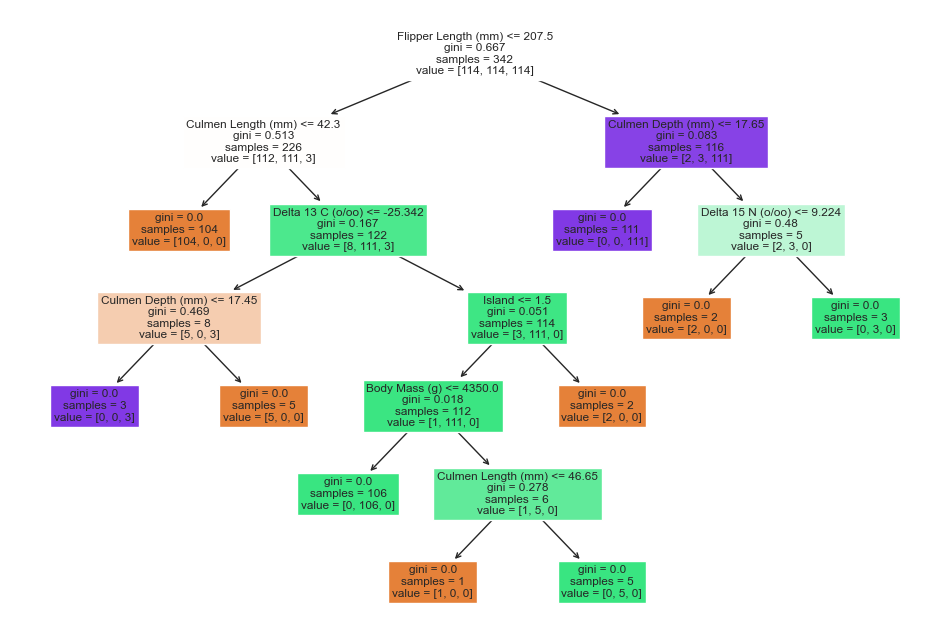

In [75]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtree1, filled = True, feature_names = x.columns)
plt.show()

In [76]:
# using hyper parameter to apply post prunning method
prunned_tree = DecisionTreeClassifier(criterion='gini',max_depth = 6)
prunned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [77]:
# user defined
def report(models):
    model_pred = models.predict(x_test)
    print(classification_report(y_test,model_pred))
    print()
    print("Accuracy Score: ",accuracy_score(y_test,model_pred))
    print('\n')
    plt.figure(figsize=(12,8),dpi =150)
    plot_tree(models,filled=True,feature_names= x.columns)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       1.00      0.97      0.99        38
           2       0.97      1.00      0.99        38

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy Score:  0.9824561403508771




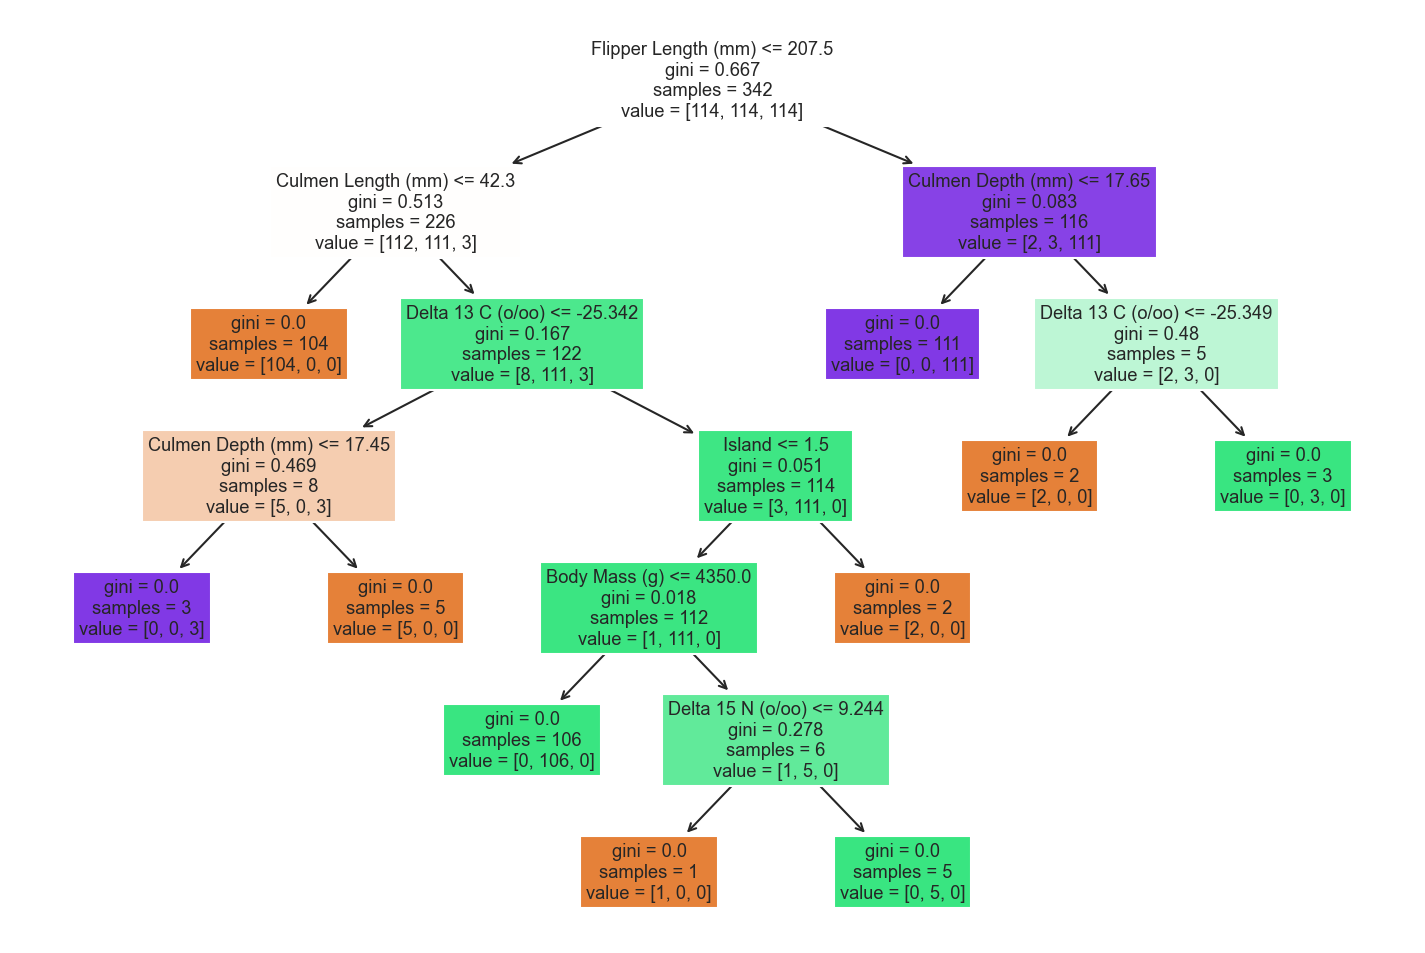

In [78]:
report(prunned_tree)

# comparing logistic regression

In [79]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred_train_logit = logit.predict(x_train)

In [81]:
y_pred_test_logit = logit.predict(x_test)

In [82]:
print(accuracy_score(y_train,y_pred_train_logit))
print()
print(accuracy_score(y_test,y_pred_test_logit))

0.9970760233918129

1.0
